# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard.

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [ ]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk # Import nltk

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Add any additional import statements you need here



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change `data_location` to the location of the folder on your machine.
# data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = "/content/drive/MyDrive/Colab Notebooks/twitter"
lyrics_folder = "/content/drive/MyDrive/Colab Notebooks/lyrics"

In [ ]:
def descriptive_stats(tokens, num_tokens_to_show = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity),
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.

    """

    if not tokens:
        if verbose:
            print("Token list is empty.")
        return [0, 0, 0.0, 0]

    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0.0

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"\nTop {num_tokens_to_show} most common tokens:")
        for token, count in Counter(tokens).most_common(num_tokens_to_show):
            print(f"{token}: {count}")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]


In [ ]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code?

A: Assert statements are unit tests to verify the descriptive_stats() function works correctly. If any assertion fails, Python will raise an AssertionError, alerting that something is wrong with the function. It can help catch issues as we run the codes.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [ ]:
# Read in the lyrics data

lyrics_data = defaultdict(dict)

for filename in os.listdir(lyrics_folder):
    if filename.endswith(".txt"):
        # Split at the first underscore to separate artist and song
        parts = filename.split("_", 1)
        if len(parts) == 2:
            artist, song_file = parts
            file_path = os.path.join(lyrics_folder, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                lyrics_data[artist][song_file] = f.read()

In [ ]:
# Read in the twitter data

twitter_descriptions = defaultdict(list)

for file in os.listdir(twitter_folder):
    if file.endswith("_followers_data.txt"):
        artist = file.replace("_followers_data.txt", "")
        path = os.path.join(twitter_folder, file)
        with open(path, "r", encoding="utf-8") as f:
            twitter_descriptions[artist] = [line.strip() for line in f if line.strip()]

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame.



In [ ]:
punctuation = set(punctuation) # speeds up comparison

def clean_tokenize(text, stopwords=sw):
    text = text.lower()
    text = ''.join(char for char in text if char not in punctuation)
    tokens = text.split()
    return [token for token in tokens if token not in stopwords]

In [ ]:
# create your clean twitter data here

cleaned_twitter = defaultdict(list)

for artist, descriptions in twitter_descriptions.items():
    for desc in descriptions:
        tokens = clean_tokenize(desc)
        cleaned_twitter[artist].append(tokens)

In [ ]:
# create your clean lyrics data here

cleaned_lyrics = defaultdict(dict)

for artist, songs in lyrics_data.items():
    for song, content in songs.items():
        tokens = clean_tokenize(content)
        cleaned_lyrics[artist][song] = tokens

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [ ]:
# Combine all tokens from all songs for each artist
def get_all_lyrics_tokens(artist):
    return [token for song in cleaned_lyrics[artist].values() for token in song]

# Combine all tokens from all tweets for each artist
def get_all_twitter_tokens(artist):
    return [token for tweet in cleaned_twitter[artist] for token in tweet]

In [ ]:
# calls to descriptive_stats here
print("=== Cher Lyrics ===")
descriptive_stats(get_all_lyrics_tokens("cher"))

print("\n=== Cher Twitter ===")
descriptive_stats(get_all_twitter_tokens("cher"))

print("\n=== Robyn Lyrics ===")
descriptive_stats(get_all_lyrics_tokens("robyn"))

print("\n=== Robyn Twitter ===")
descriptive_stats(get_all_twitter_tokens("robynkonichiwa"))

=== Cher Lyrics ===
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.

Top 5 most common tokens:
love: 1004
im: 513
know: 486
dont: 440
youre: 333

=== Cher Twitter ===
There are 42404149 tokens in the data.
There are 10667110 unique tokens in the data.
There are 266424726 characters in the data.
The lexical diversity is 0.252 in the data.

Top 5 most common tokens:
0: 334292
1: 284601
2: 237886
love: 221728
3: 196690

=== Robyn Lyrics ===
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.

Top 5 most common tokens:
know: 308
dont: 301
im: 299
love: 275
got: 251

=== Robyn Twitter ===
There are 3888265 tokens in the data.
There are 1136751 unique tokens in the data.
There are 24106279 characters in the data.
The lexical diversity is 0.292 in the data.

Top 5 most co

[3888265, 1136751, 0.29235430198301815, 24106279]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A: If we leave out the stopwords in the dataset, the top 5 most common words would most likely be dominant by those stopwords.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs?

A: Not much knowledge regarding these two artist. However, it does seems like Robyn has a higher lexical diversity than Cher in both Lyrics and Twitter. This might means that Robyn is more diverse. Although it is not a big difference.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist.
1. For each artist, a histogram of song lengths (in terms of number of tokens)

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [ ]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions?


In [ ]:
# Helper function to extract emojis from text
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

# Assuming twitter_descriptions dictionary is available
emoji_counts = defaultdict(Counter)

# Example structure simulation for demonstration
# Replace this with your actual twitter_descriptions data if needed
try:
    twitter_descriptions  # Check if it exists
except NameError:
    twitter_descriptions = defaultdict(list)

# Count emojis
for artist, descriptions in twitter_descriptions.items():
    for desc in descriptions:
        emoji_counts[artist].update(extract_emojis(desc))

# Get top 10 emojis per artist
top_10_emojis_per_artist = {
    artist: counter.most_common(10)
    for artist, counter in emoji_counts.items()
}


In [ ]:
for artist, emoji_list in top_10_emojis_per_artist.items():
    print(f"\nTop 10 emojis for {artist}:")
    for emj, count in emoji_list:
        print(f"{emj} : {count}")



Top 10 emojis for robynkonichiwa:
🌈 : 6086
❤ : 5635
🏳 : 4641
♥ : 4249
✨ : 3217
🏻 : 1751
✌ : 1495
♀ : 1347
🏼 : 1340
💙 : 1200

Top 10 emojis for cher:
❤ : 94506
🌈 : 66291
♥ : 48059
🏳 : 47174
✨ : 45846
🌊 : 31234
💙 : 31050
🏻 : 25195
✌ : 21963
💜 : 21571


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions?


In [ ]:
# Count hashtags
hashtag_counts = defaultdict(Counter)

# Extract hashtags from twitter_descriptions
for artist, descriptions in twitter_descriptions.items():
    for desc in descriptions:
        hashtags = [word.lower() for word in desc.split() if word.startswith("#")]
        hashtag_counts[artist].update(hashtags)

# Get top 10 hashtags per artist
top_10_hashtags_per_artist = {
    artist: counter.most_common(10)
    for artist, counter in hashtag_counts.items()
}

In [ ]:
for artist, counter in hashtag_counts.items():
    print(f"\nTop 10 hashtags for {artist}:")
    for hashtag, count in counter.most_common(10):
        print(f"{hashtag}: {count}")


Top 10 hashtags for robynkonichiwa:
#blacklivesmatter: 601
#blm: 365
#music: 262
#1: 213
#: 175
#teamfollowback: 118
#edm: 104
#resist: 77
#freebritney: 70
#blacktranslivesmatter: 58

Top 10 hashtags for cher:
#resist: 9729
#blm: 9271
#blacklivesmatter: 7770
#fbr: 2991
#theresistance: 2929
#1: 2580
#resistance: 2438
#: 2205
#voteblue: 1939
#lgbtq: 1461


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [ ]:
# Count title words per artist
title_word_counts = defaultdict(Counter)

# Extract the first line (title) from each lyrics file and count words
for artist, songs in lyrics_data.items():
    for song_file, content in songs.items():
        first_line = content.strip().split('\n')[0]
        words = first_line.lower().split()
        title_word_counts[artist].update(words)

# Get top 5 most common words per artist
top_5_title_words = {
    artist: counter.most_common(5)
    for artist, counter in title_word_counts.items()
}

In [ ]:
for artist, words in top_5_title_words.items():
    print(f"\nTop 5 title words for {artist}:")
    for word, count in words:
        print(f"{word}: {count}")


Top 5 title words for cher:
the: 29
to: 28
"the: 24
of: 21
"i: 21

Top 5 title words for robyn:
you: 7
the: 7
me: 7
my: 6
to: 6


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out.


,length
artist,
Artist 1,"Axes(0.125,0.11;0.775x0.77)"
Artist 2,"Axes(0.125,0.11;0.775x0.77)"


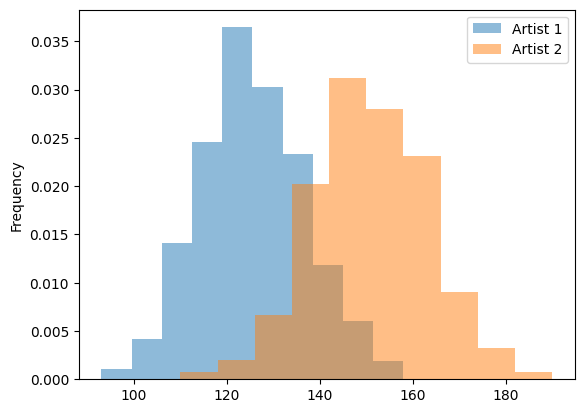

In [ ]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting.

Q: What does the regular expression `'\s+'` match on?

A: The regular expression \s+ matches one or more whitespace characters.


In [ ]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) :
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

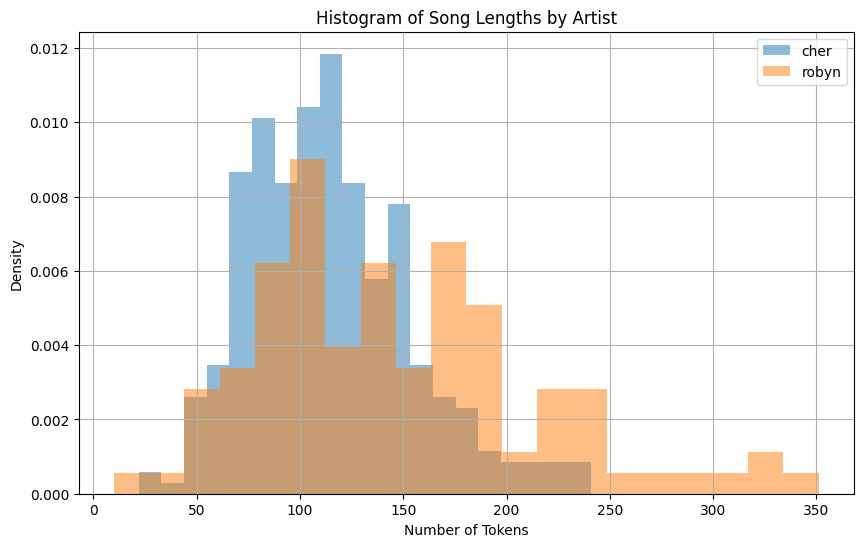

In [ ]:
# Your lyric length comparison chart here.
# Simulate cleaned_lyrics dictionary if not already defined
try:
    cleaned_lyrics
except NameError:
    cleaned_lyrics = defaultdict(dict)

# Build the DataFrame with song lengths per artist
data = {
    "artist": [],
    "length": []
}

for artist, songs in cleaned_lyrics.items():
    for song, tokens in songs.items():
        data["artist"].append(artist)
        data["length"].append(len(tokens))

df_lengths = pd.DataFrame(data)

# Plot the histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for artist, group in df_lengths.groupby("artist"):
    group["length"].plot(kind="hist", bins=20, density=True, alpha=0.5, legend=True, label=artist)

plt.title("Histogram of Song Lengths by Artist")
plt.xlabel("Number of Tokens")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()